### Import Packages

In [8]:
import pandas as pd
import seaborn as sb
import os
import math
from matplotlib import pyplot as plt
import scipy
import pingouin as pg
import scipy.stats as stats
import statsmodels
import numpy as np
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import binom_test
from analysis_helpers import *
from  matplotlib.ticker import FuncFormatter
import pingouin as pg
import scipy
from scipy import stats
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

### Load & Concatenate data 

In [2]:
data_d = {'Subjective Ratings Over Image':[]}

for x in os.listdir('exp8_data'):
    if x != '.DS_Store' and x!='.ipynb_checkpoints' and 'SUBJ_PILOT' in x:
        df = pd.read_csv('exp8_data/'+x)
        df['version'] = 'Subjective Ratings Over Image'
        data_d['Subjective Ratings Over Image'].append(df)
        
full_data = pd.concat(data_d['Subjective Ratings Over Image'])
full_data['version'] = 'Subjective Ratings Over Image'
#full_data.to_csv('exp8_compiled_data.csv')

### Prep Data

In [3]:
# Get the rows with response data
l = full_data['responses'].str.contains('pre')
m = full_data['responses'].str.contains('post')

full_data['resp'] = np.nan
full_data[['responses']] = full_data[['responses']].fillna('nope')
full_data.loc[full_data['responses'].str.contains('post-'), 'resp']=True
full_data.loc[full_data['responses'].str.contains('pre') , 'resp']=True

# Drop Nans 
good = full_data[(full_data['resp']==True) & ~(full_data['trial_index'].isin([15, 16, 17, 18]))]#.head(n=2)

# Obtain all images
li = list(full_data['image'].dropna())

# Assign images to response trials
image_list = [[x]*4 for x in li]
unnest = [item for sublist in image_list for item in sublist]
good['image'] = unnest

# Label images - veridical v scrambled
good['Type'] = np.nan
good.loc[good['image'].str.contains('scramble'),  'Type']='Scrambled'
good.loc[good['image'].str.contains('veridical'), 'Type']='Veridical'

# Pull out ratings reponses (as ints)
p = [int(f[-2]) for f in list(good['responses'])]
good['Rating'] = p

# Pull out Question Numbers (as ints)
v = [f[6:8] for f in list(good['responses'])]
good['Question'] = v

# Prep data for plotting
grp = good.groupby(['ID','Question', 'Type'], as_index=False).mean()

### Plot results

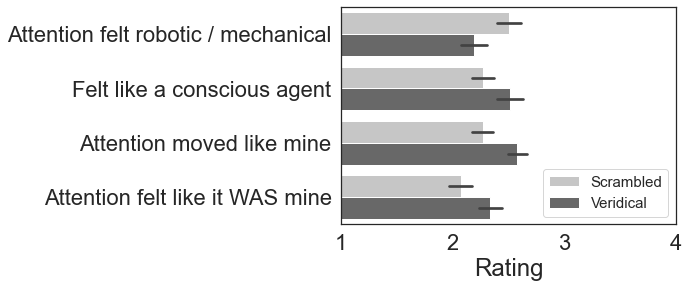

In [7]:
sb.set(font_scale=2)
sb.set_style("white")

g = sb.barplot(hue='Type', y='Question', x='Rating', data=grp, palette='Greys',errorbar='se')
               #palette='Greys',errorbar='se')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
g.set_xticklabels(['1','2','3','4'])
g.set_ylabel("")

g.set_xlim(0,3)
g.set_yticklabels(['Attention felt robotic / mechanical','Felt like a conscious agent',
                   'Attention moved like mine','Attention felt like it WAS mine'])

#place legend in center right of plot
g.legend(loc='lower right',fontsize='15')

plt.savefig('figures/figure_5.pdf', bbox_inches='tight')
